<a href="https://colab.research.google.com/github/silvererudite/ML_algos_onSomeDatasets/blob/master/openCV_tut.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import cv2 as cv
from google.colab.patches import cv2_imshow

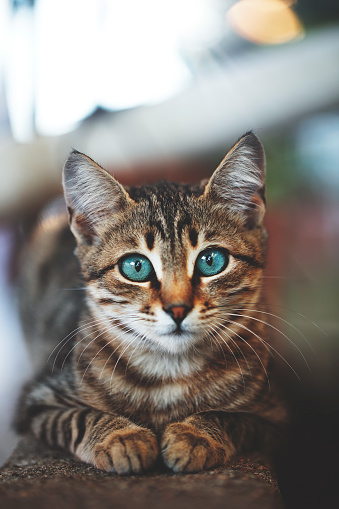

-1

In [4]:
img = cv.imread('/content/cat1.jpg')
cv2_imshow(img)
cv.waitKey(0)


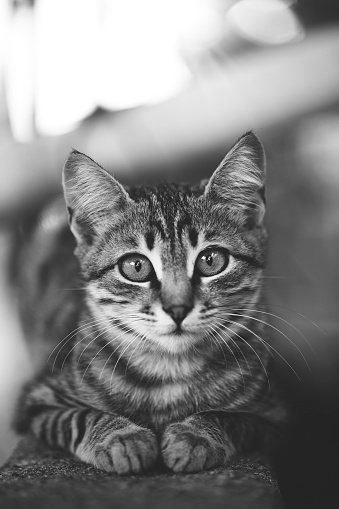

-1

In [5]:
import numpy as np
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
cv2_imshow(gray)
cv.waitKey(0)

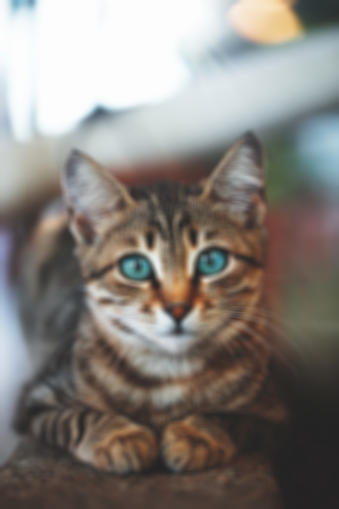

In [6]:
blur = cv.GaussianBlur(img, (7,7), cv.BORDER_DEFAULT)
cv2_imshow(blur)

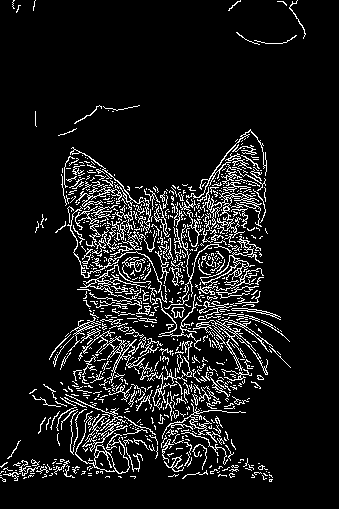

In [7]:
# edge cascade
img2 = cv.imread('/content/me.jpg')
canny = cv.Canny(img, 125, 175)
canny2 = cv.Canny(blur, 125, 175)
cv2_imshow(canny)

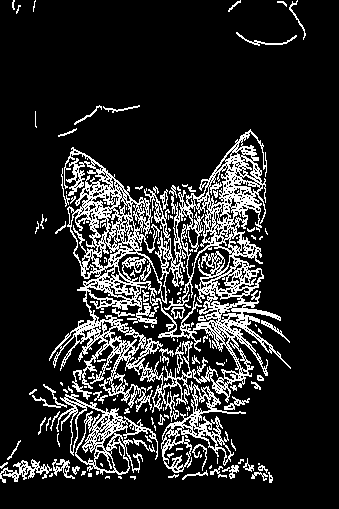

In [8]:
# dilating the image
dilated = cv.dilate(canny, (3,3), iterations = 1)
cv2_imshow(dilated)

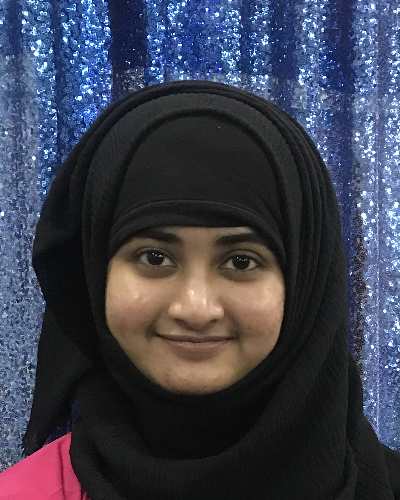

In [9]:
#resize and crop
resized = cv.resize(img2, (400,500), interpolation = cv.INTER_CUBIC)
cv2_imshow(resized)

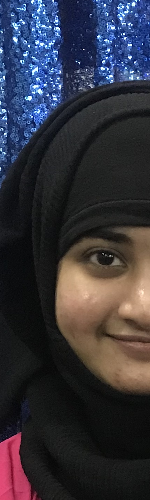

In [10]:
cropped = resized[:,50:200]
cv2_imshow(cropped)

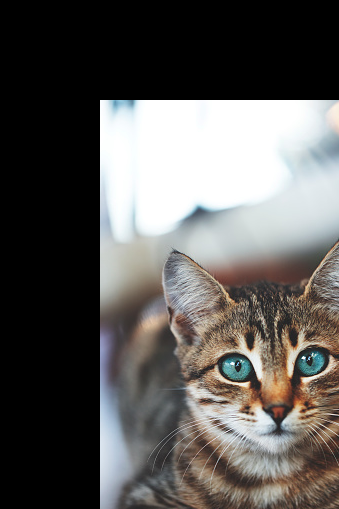

In [11]:
#translation
def translate(img, x, y):
  transMat = np.float32([[1,0,x],[0,1,y]])
  dimensions = (img.shape[1], img.shape[0])
  return cv.warpAffine(img, transMat, dimensions)

# -x --> left
#-y --> up
# x --> right
# y --> down

translated = translate(img, 100, 100)
cv2_imshow(translated)


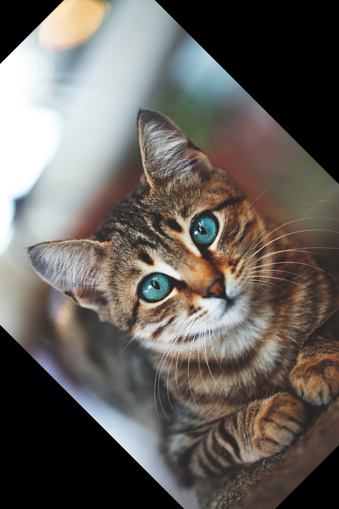

In [12]:
# rotation
def rotate(img, angle, rotPoint = None):
  (height, width) = img.shape[:2]
  if rotPoint is None:
    rotPoint = (width//2, height//2)
  rotMat = cv.getRotationMatrix2D(rotPoint, angle, 1.0)
  dimensions = (width, height)

  return cv.warpAffine(img, rotMat, dimensions)

rotated = rotate(img, 45)
cv2_imshow(rotated)


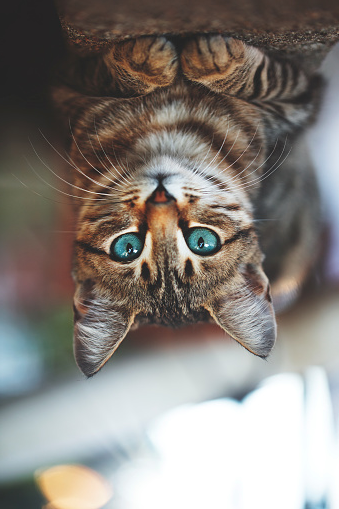

In [13]:
# flipping

flip = cv.flip(img, -1) #0, 1, -1
cv2_imshow(flip)

In [14]:
# contours
contours, hierarchies = cv.findContours(canny2, cv. RETR_LIST, cv.CHAIN_APPROX_SIMPLE)
print(f'{len(contours)} contour(s) found!')

75 contour(s) found!


In [15]:
ret, thresh = cv.threshold(gray, 125, 255, cv.THRESH_BINARY)
contours1, hierarchies1 = cv.findContours(thresh, cv. RETR_LIST, cv.CHAIN_APPROX_SIMPLE)
print(f'{len(contours)} contour(s) found!')

75 contour(s) found!


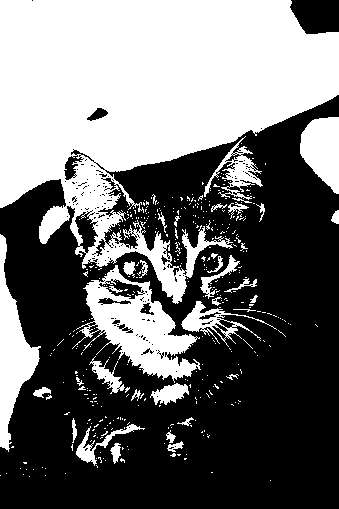

In [16]:
cv2_imshow(thresh)

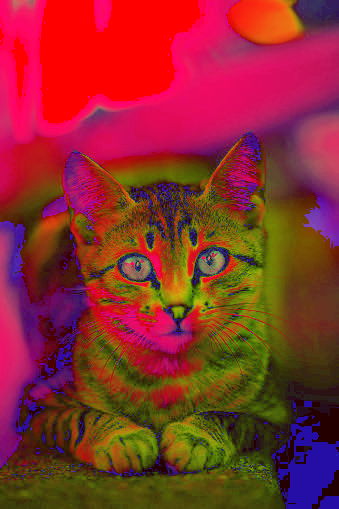

In [17]:
#hsv format
hsv =  cv.cvtColor(img, cv.COLOR_BGR2HSV)
cv2_imshow(hsv)

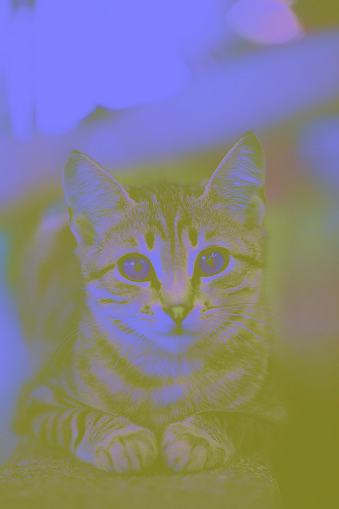

In [18]:
# LAB color space
lab =  cv.cvtColor(img, cv.COLOR_BGR2LAB)
cv2_imshow(lab)

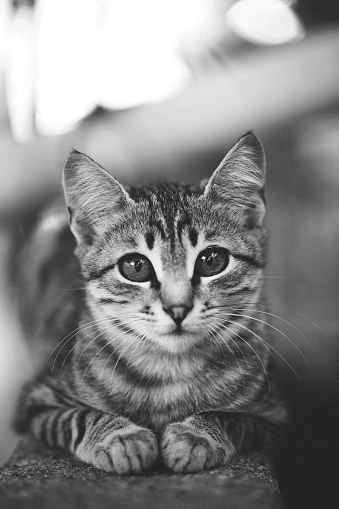

In [21]:
#split and merge color channels
b, g, r =  cv.split(img)
cv2_imshow(r)

In [22]:
img.shape

(509, 339, 3)

In [23]:
b.shape

(509, 339)

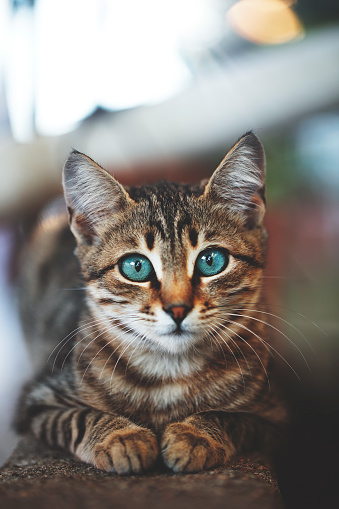

In [24]:
merged = cv.merge([b,g,r])
cv2_imshow(merged)

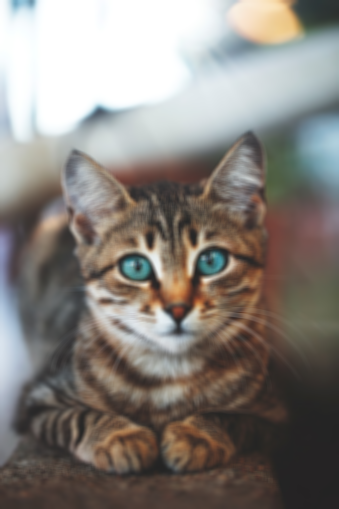

In [26]:
# blur or smoothing image
#averaging
average =  cv.blur(img, (5,5))
cv2_imshow(average)

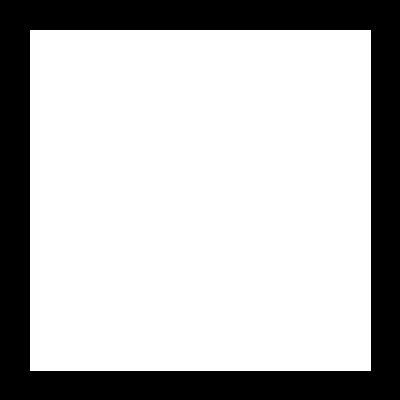

In [28]:
# bitwise operations

blank = np.zeros((400,400),dtype="uint8")
rectangle =  cv.rectangle(blank.copy(), (30,30),(370,370), 255, -1)
circle = cv.circle(blank.copy(), (200,200), 200, 255, -1)
cv2_imshow(rectangle)

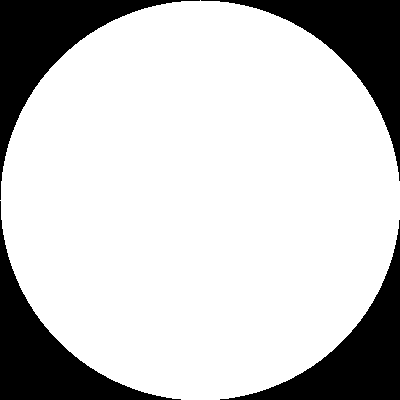

In [29]:
cv2_imshow(circle)

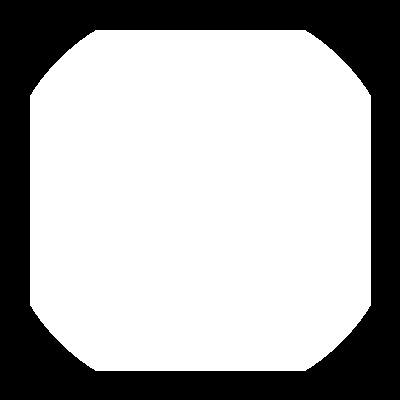

In [30]:
# bitwise and
bitwise_and = cv.bitwise_and(rectangle, circle)
cv2_imshow(bitwise_and)